# Truck Sales Data Analysis

In [1]:
import pandas as pd    # data pre-processing 
import matplotlib.pyplot as plt      # utilizing different plots
import seaborn as sns      # utilizing advanced plots 
from collections import Counter    # counting collections 

In [2]:
# reading csv file and checking file contents
df = pd.read_csv("Documents/truck_sales.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Month-Year          144 non-null    object
 1   Number_Trucks_Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [3]:
# making the fontsize of all our graphs 10 
plt.rcParams.update({'font.size' : 10})

In [4]:
# data frame
df

,Month-Year,Number_Trucks_Sold
0,03-Jan,155
1,03-Feb,173
2,03-Mar,204
3,03-Apr,219
4,03-May,223
...,...,...
139,14-Aug,933
140,14-Sep,704
141,14-Oct,639
142,14-Nov,571


In [5]:
df.head() # first 5 columns

,Month-Year,Number_Trucks_Sold
0,03-Jan,155
1,03-Feb,173
2,03-Mar,204
3,03-Apr,219
4,03-May,223


In [6]:
df.tail() # last 5 columns

,Month-Year,Number_Trucks_Sold
139,14-Aug,933
140,14-Sep,704
141,14-Oct,639
142,14-Nov,571
143,14-Dec,666


In [7]:
# min number of trucks sold
df['Number_Trucks_Sold'].min()

152

In [8]:
# max number of trucks sold
df['Number_Trucks_Sold'].max()

958

In [9]:
# seeing the dates of minimum # of trucks sold
df[df['Number_Trucks_Sold'] == 152]

,Month-Year,Number_Trucks_Sold
10,03-Nov,152


In [10]:
# the date of maximum # of trucks sold
df[df['Number_Trucks_Sold'] == 958]

,Month-Year,Number_Trucks_Sold
138,14-Jul,958


In [11]:
# using seaborn style on plots
print(plt.style.available)
plt.style.use('seaborn-v0_8-dark')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [12]:
# number of trucks sold that's greater than 500
df[df['Number_Trucks_Sold'] >= 500]

,Month-Year,Number_Trucks_Sold
78,09-Jul,561
79,09-Aug,535
87,10-Apr,530
88,10-May,587
89,10-Jun,576
90,10-Jul,636
91,10-Aug,624
98,11-Mar,548
99,11-Apr,590
100,11-May,656


### Total truck sales per month?

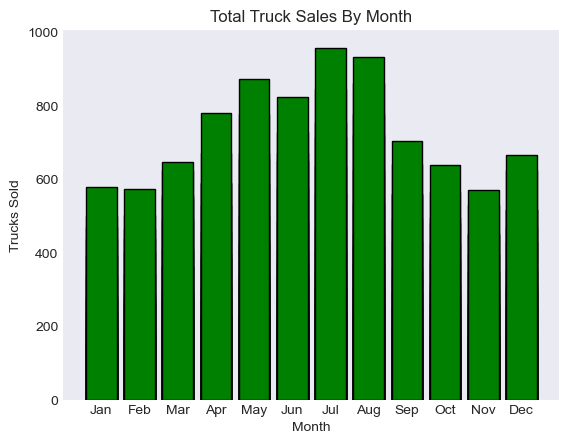

In [13]:
# looking at the first five rows once again
df.head()

# slicing the month column and only grabbing the month
month = df['Month-Year'].str[3:6]

# creating bar chart
plt.bar(month, df['Number_Trucks_Sold'], color = 'green', edgecolor = 'black')
plt.title('Total Truck Sales By Month')
plt.xlabel('Month')
plt.ylabel('Trucks Sold')
plt.show()

### Are there any outliers in the Truck Sales over the years?

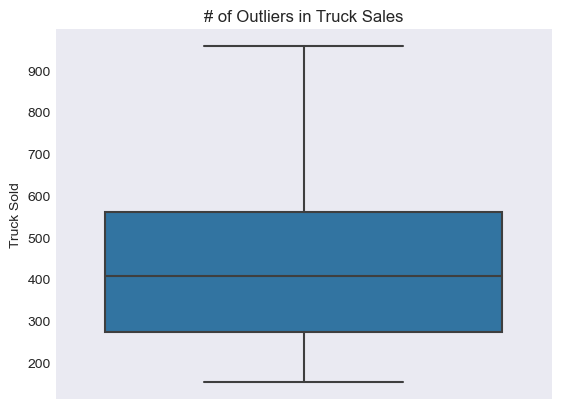

In [14]:
# creating box plot to show outliers in the sales data
sns.boxplot(df['Number_Trucks_Sold'])
plt.title('# of Outliers in Truck Sales')
plt.ylabel('Truck Sold')
plt.xticks(visible = False)
plt.show()

### What does the trend of truck sales look with a scatterplot?

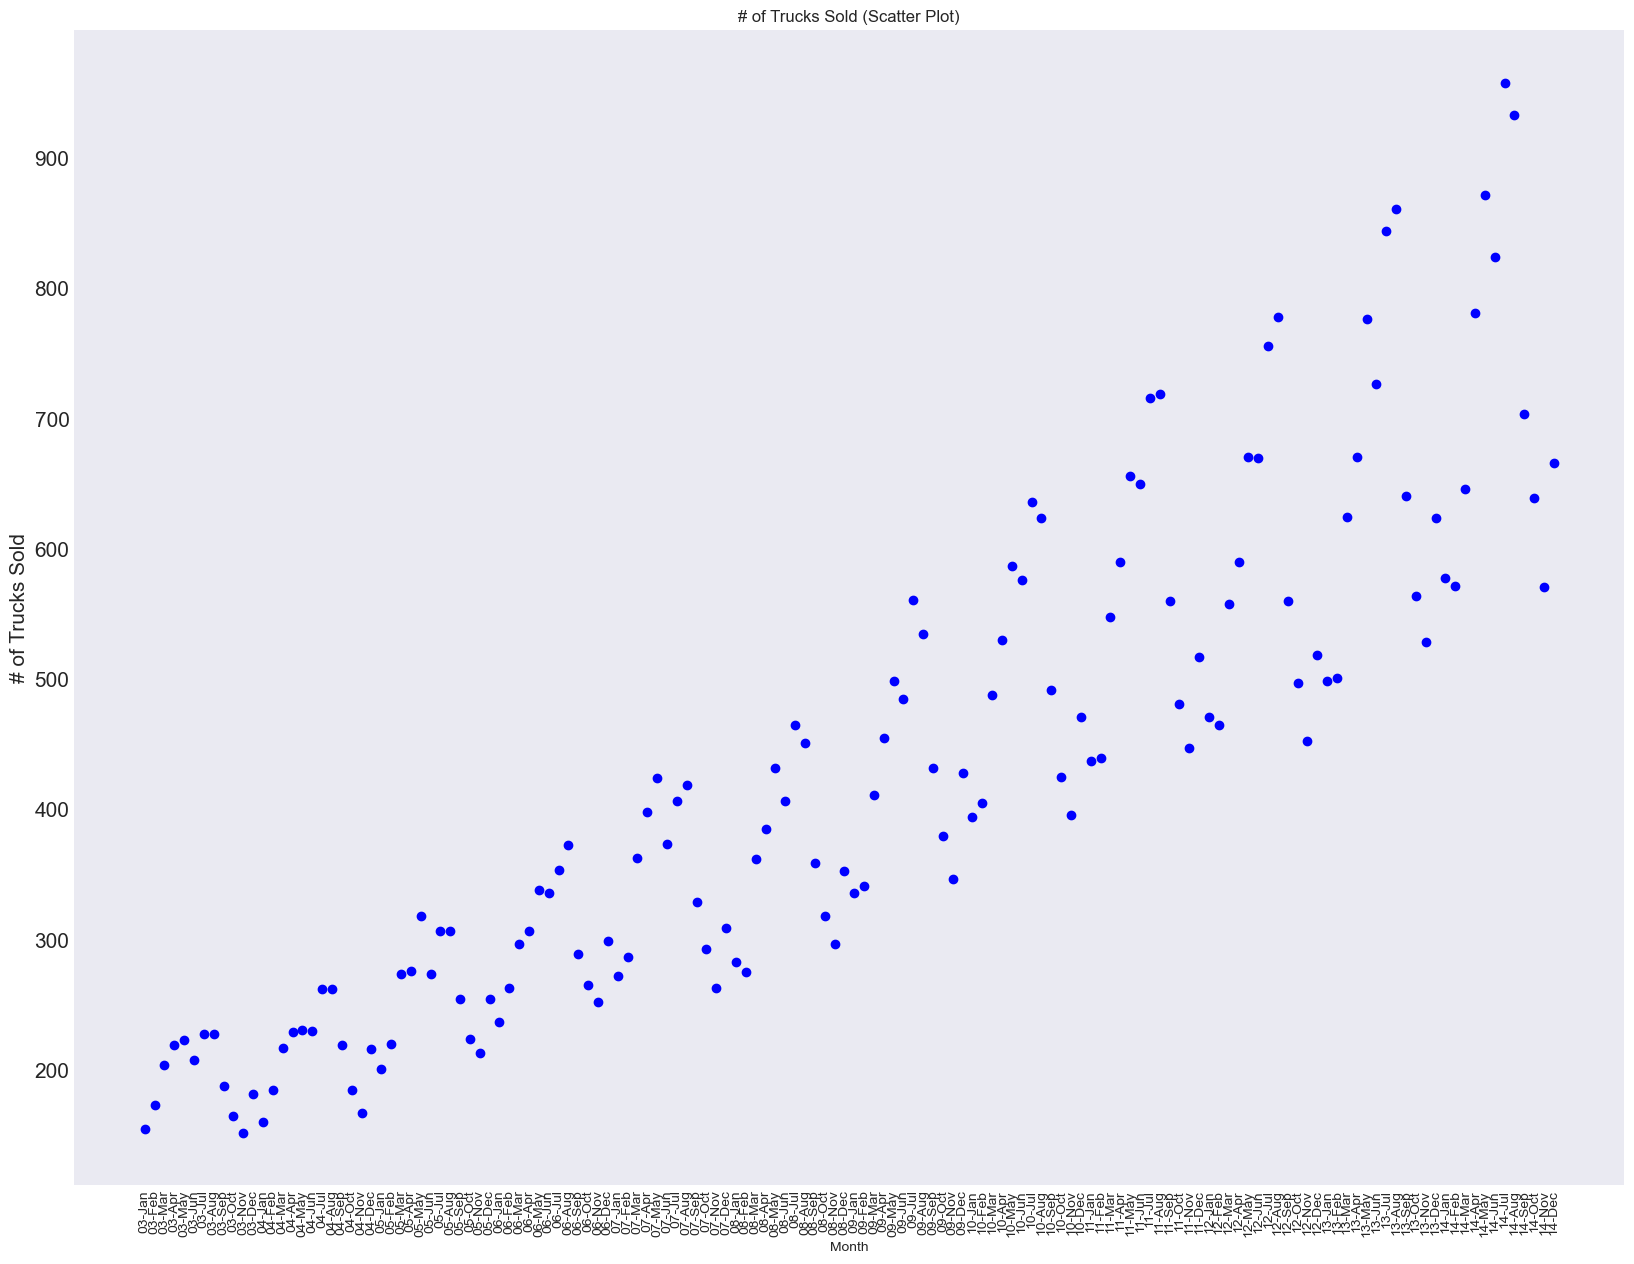

In [15]:
# looking at first 5 rows
df.head()

# creating scatter plot
plt.figure(figsize = (20, 15))
plt.scatter(df['Month-Year'], df['Number_Trucks_Sold'], color = 'blue')
plt.title('# of Trucks Sold (Scatter Plot)')
plt.xlabel('Month')
plt.ylabel('# of Trucks Sold', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

### What is the rolling average of sales as opposed to the actual?

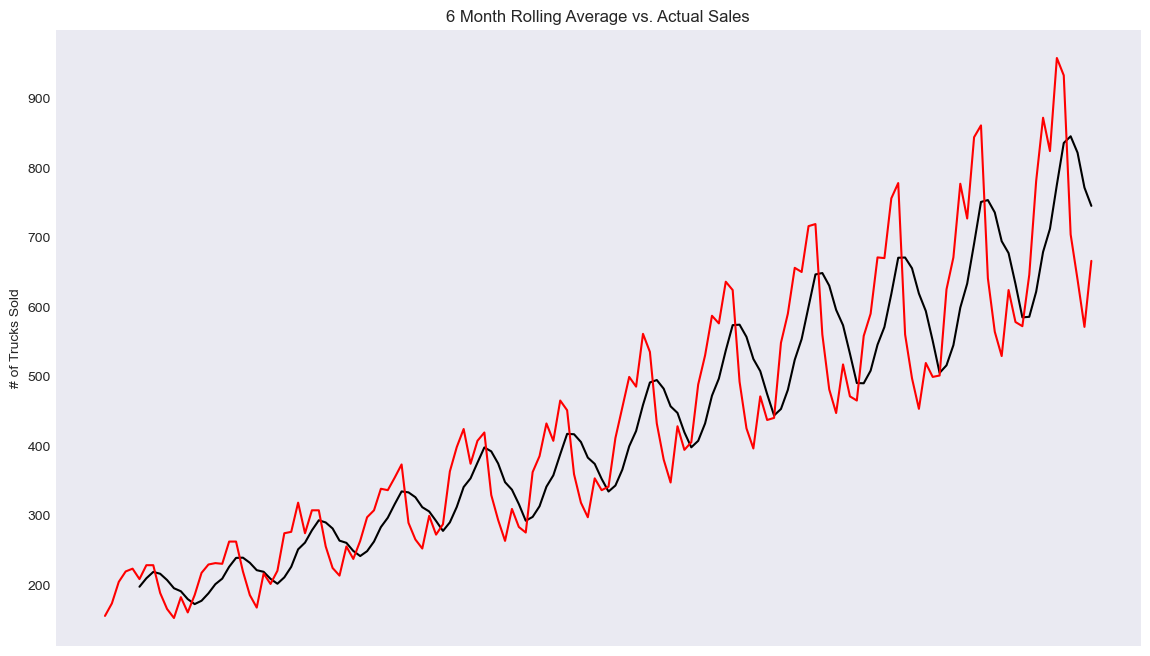

In [16]:
# looking at the rolling average vs. actual
plt.figure(figsize = (14, 8))
df['Rolling Average'] = df['Number_Trucks_Sold'].rolling(window = 6).mean().plot(label = '6 Mon. Rolling Average', color = 'black')
df['Number_Trucks_Sold'].plot(kind = 'line', label = 'Actual Sales', color = 'red')
plt.title('6 Month Rolling Average vs. Actual Sales')
plt.xticks(visible = False)
plt.ylabel('# of Trucks Sold')
plt.show()

### How many trucks have been sold in the years past?

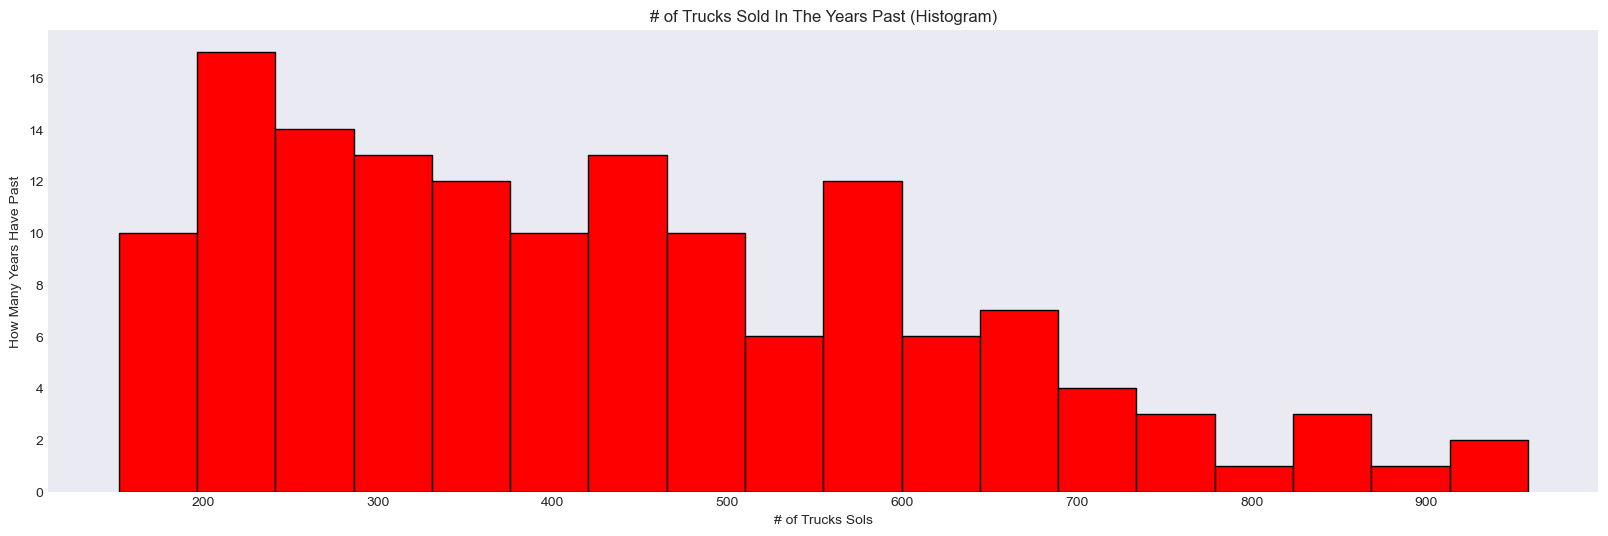

In [17]:
# creating histogram
plt.figure(figsize = (20, 6))
plt.hist(df['Number_Trucks_Sold'], bins = 18, color = 'red', edgecolor = 'black')
plt.ylabel('How Many Years Have Past')
plt.title('# of Trucks Sold In The Years Past (Histogram)')
plt.xlabel('# of Trucks Sols')
plt.show()

### How would a stackplot show the # of trucks sold?

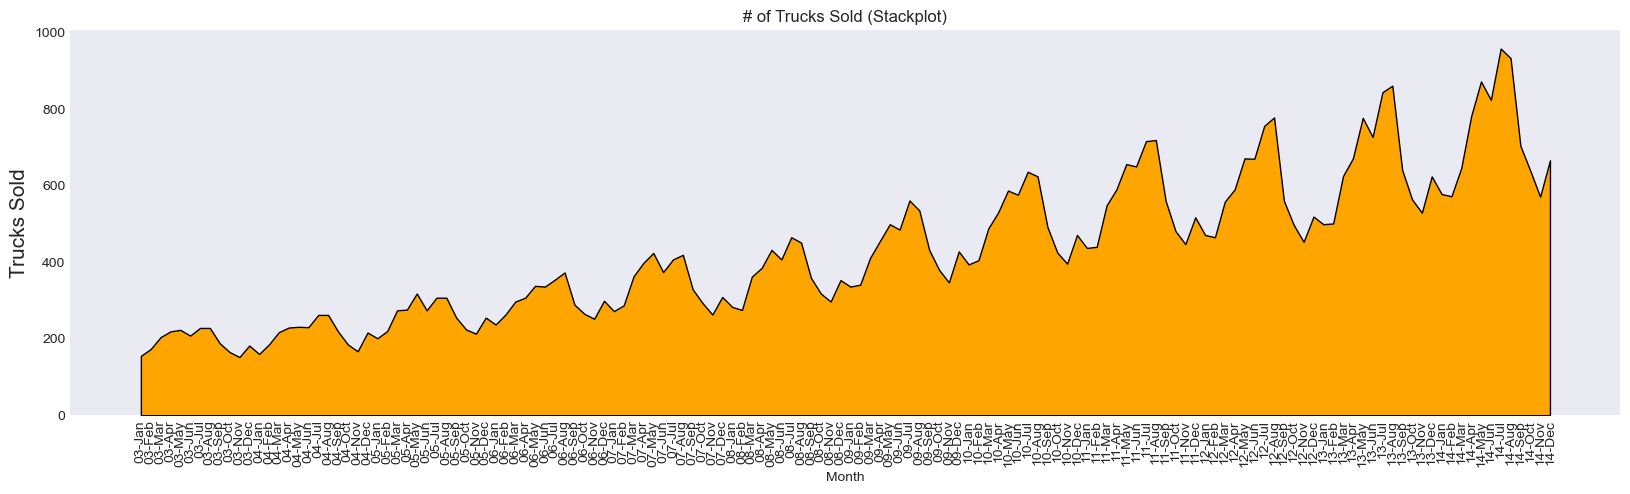

In [18]:
# creating tuples in case we need to make pie chart
month_tuple = tuple(df['Month-Year'])
value_tuple = tuple(df['Number_Trucks_Sold'])

# creating our stackplot
plt.figure(figsize = (20, 5))
plt.stackplot(df['Month-Year'], df['Number_Trucks_Sold'], color = 'orange', edgecolor = 'black')
plt.xlabel('Month')
plt.ylabel('Trucks Sold', fontsize = 15)
plt.title('# of Trucks Sold (Stackplot)')
plt.xticks(rotation = 90)
plt.show()

### What was the rolling standard deviation in the last couple of months?

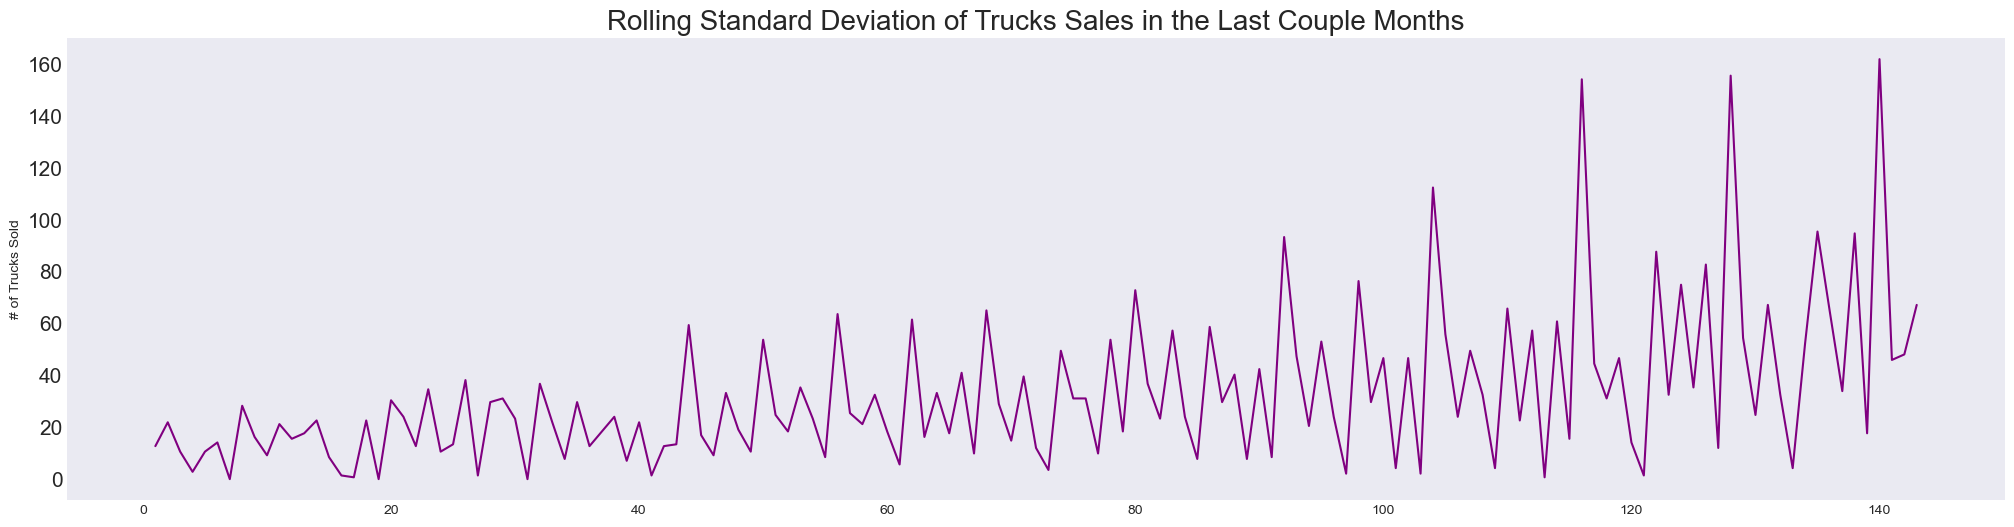

In [19]:
# Looking at last month's sales
plt.figure(figsize = (25, 6))
df['Rolling Standard Deviation'] = df['Number_Trucks_Sold'].rolling(window = 2).std().plot(x = df['Month-Year'], kind = 'line', label = 'Rolling Standard Deviation', color = 'purple')
plt.ylabel('# of Trucks Sold')
plt.title('Rolling Standard Deviation of Trucks Sales in the Last Couple Months', fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(visible = 90)
plt.show()

### How would a line plot look like to show the # of trucks sold?

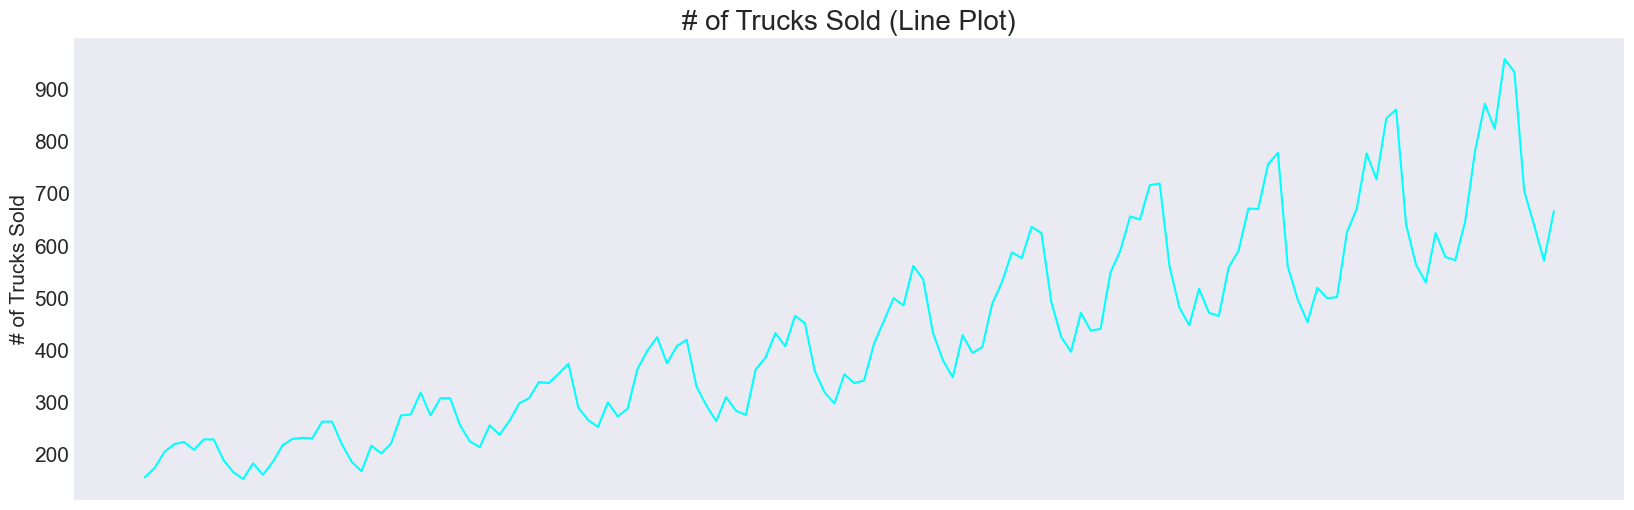

In [20]:
# creating line plot using seaborn 
df.head()
plt.figure(figsize = (20, 6))
sns.lineplot(df['Number_Trucks_Sold'], color = 'cyan')
plt.ylabel('# of Trucks Sold', fontsize = 15)
plt.title('# of Trucks Sold (Line Plot)', fontsize = 20)
plt.xticks(visible = False)
plt.yticks(fontsize = 15)
plt.show()

### What's the trend in how many trucks have been sold?

<Figure size 2000x600 with 0 Axes>

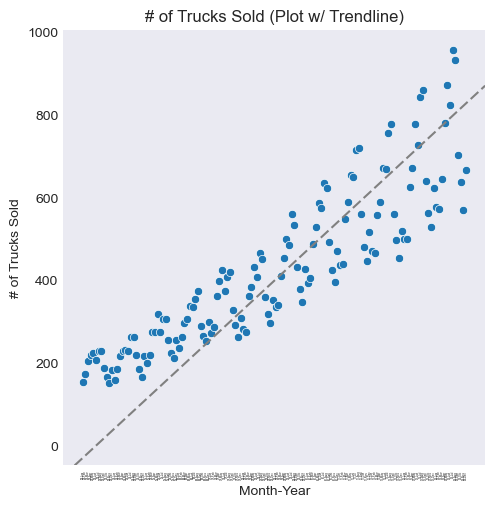

In [21]:
# looking at first five rows again
df.head()

# creating a relplot including a trendline
plt.figure(figsize = (20, 6))
plot = sns.relplot(data = df, x = df['Month-Year'], y = df['Number_Trucks_Sold'])
plot.ax.axline(xy1 = (5, 0), slope = 6, dashes = (5, 2), color = 'gray')
plt.ylabel('# of Trucks Sold')
plt.title('# of Trucks Sold (Plot w/ Trendline)')
plt.xticks(rotation = 90, fontsize = 2)
plt.show()

### What are the cumulative sales for trucks over time?

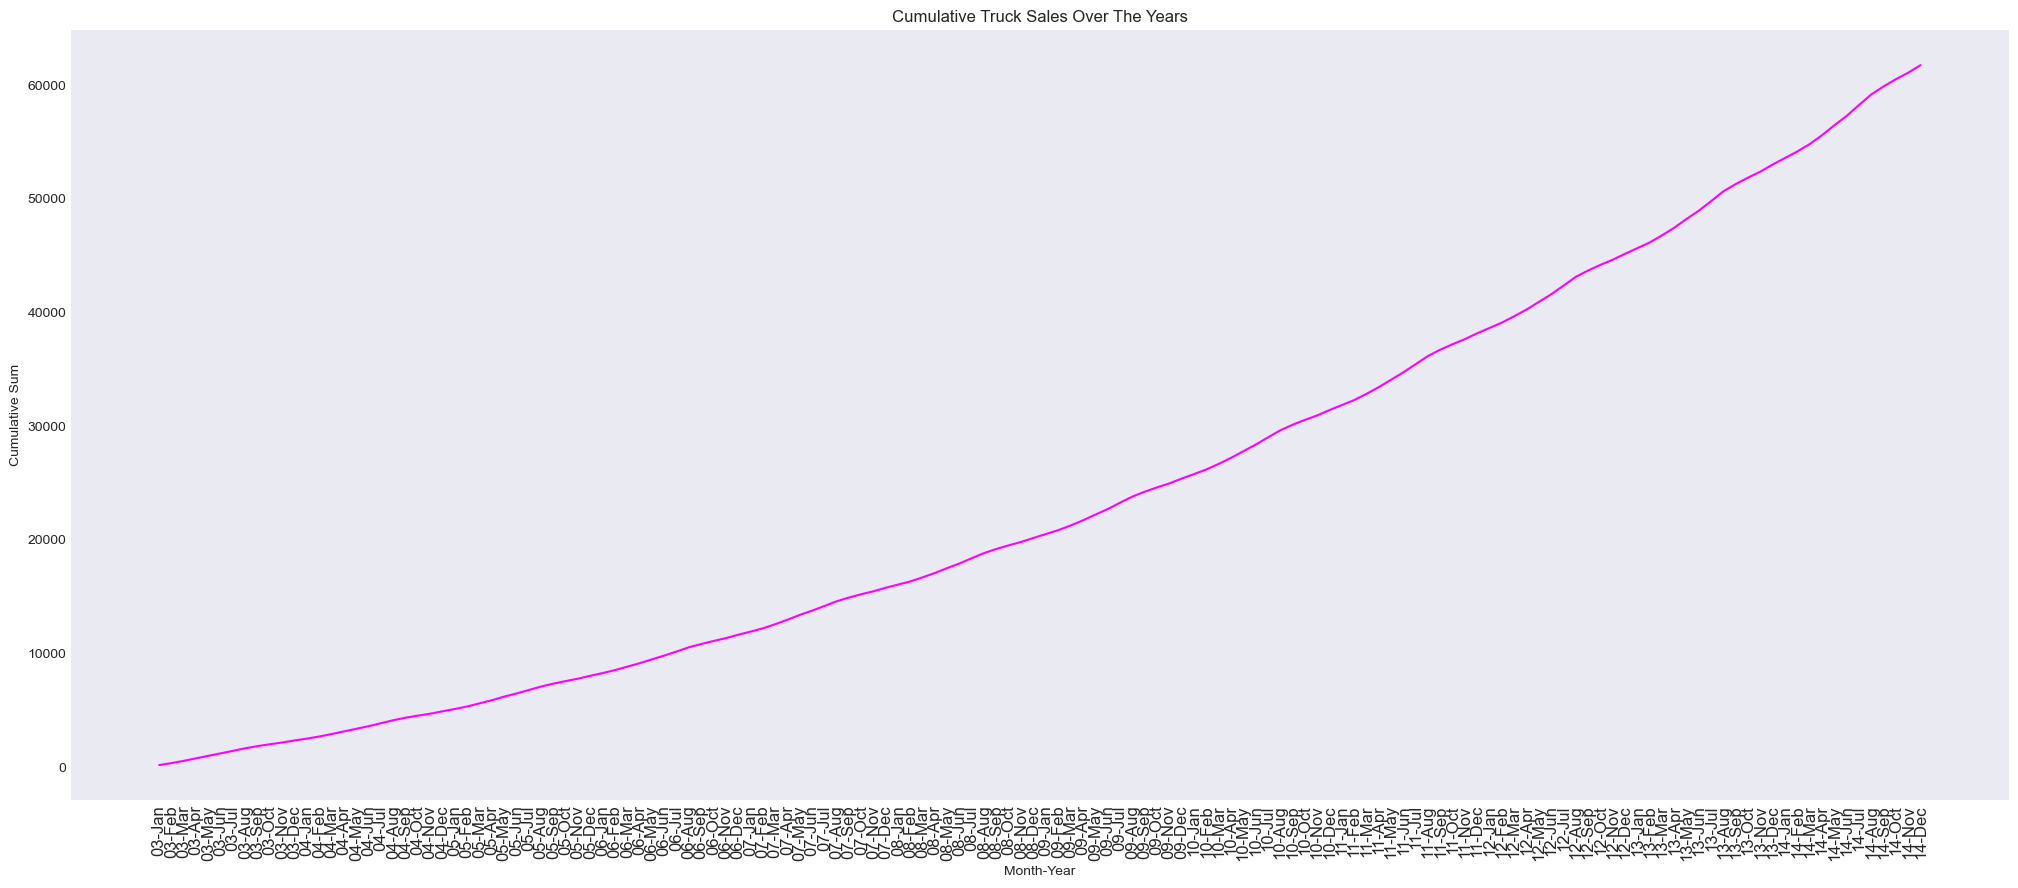

In [22]:
# plotting the cumulative sum 
plt.figure(figsize = (25, 10))
df['Cumulative Sum'] = df['Number_Trucks_Sold'].cumsum()
sns.lineplot(x = df['Month-Year'], y = df['Cumulative Sum'], color = 'magenta')
plt.title('Cumulative Truck Sales Over The Years')
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks()
plt.show()

### What is the trend in sales data from the start to the end?

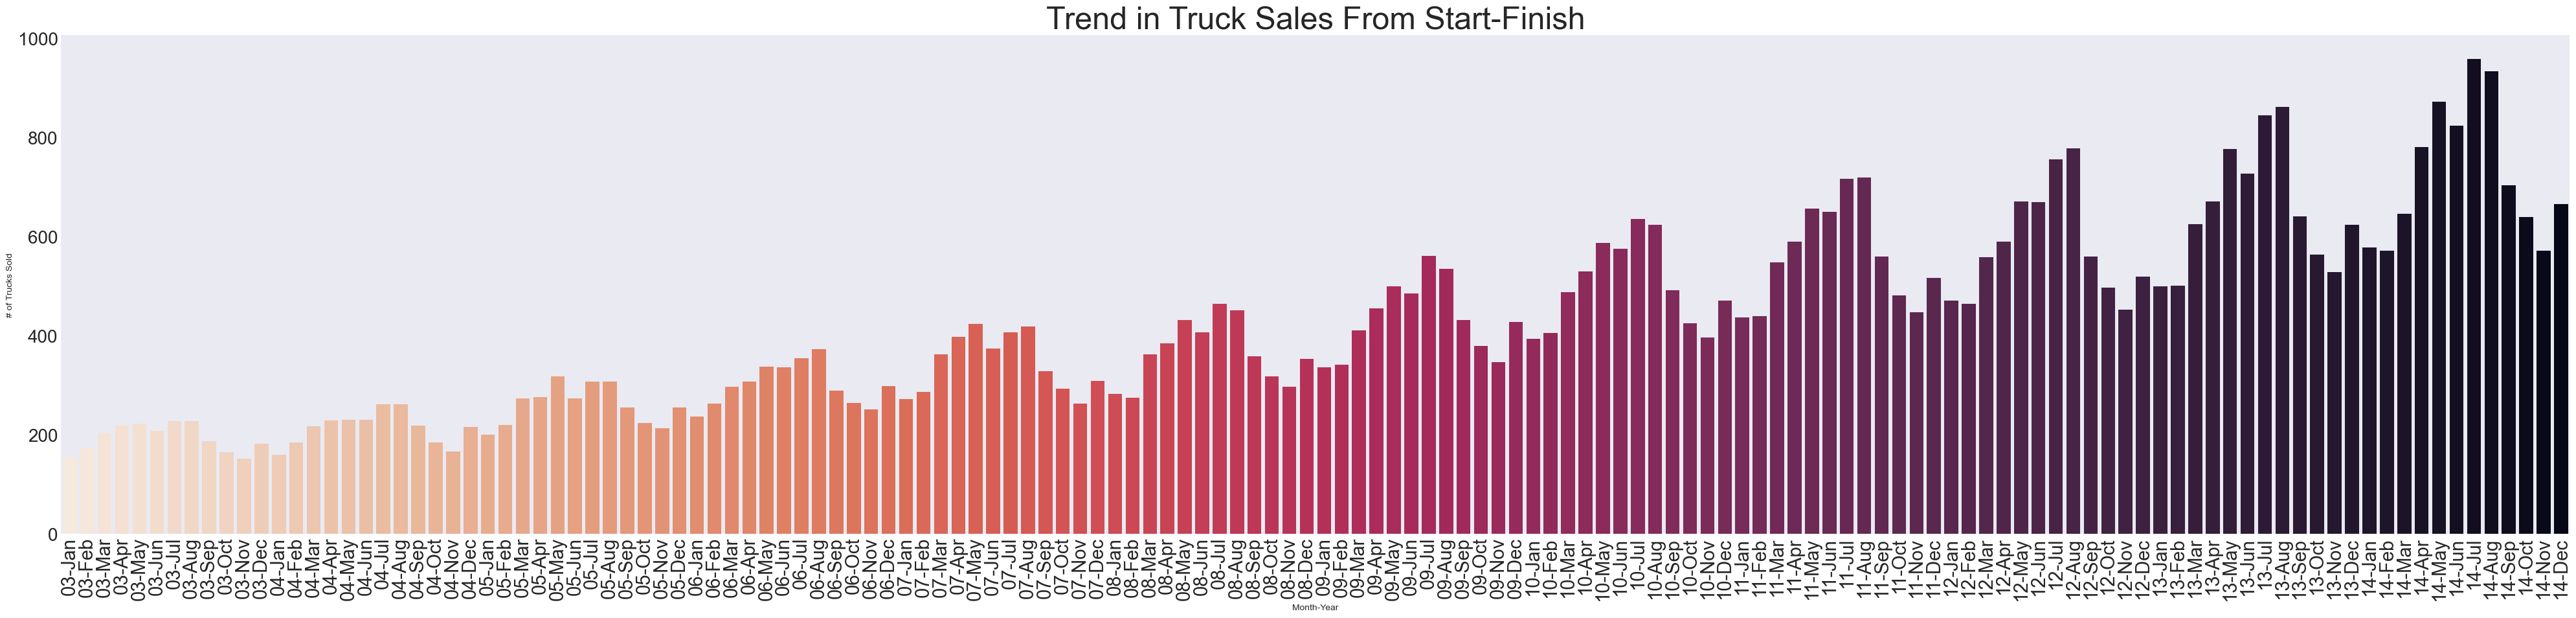

In [23]:
# creating a bar plot to look at trend data for sales
plt.figure(figsize = (50, 10))
sns.barplot(data = df, x = 'Month-Year', y = 'Number_Trucks_Sold', palette = 'rocket_r')
plt.yticks(fontsize = 20)
plt.ylabel('# of Trucks Sold')
plt.xticks(rotation = 90, fontsize = 21)
plt.title('Trend in Truck Sales From Start-Finish', fontsize = 35)
plt.show()

### How many total times did the company hit their quota opposed missing it and which is greater?

In [24]:
# filtering out slicer warnings
import warnings
warnings.filterwarnings('ignore')

# quota status data frame
data = {'# of Trucks Sold': pd.Series(df['Number_Trucks_Sold'], index = df['Month-Year'])}
quota_df = pd.DataFrame(data = df)
quota_status = quota_df.loc[:, ['Month-Year', 'Number_Trucks_Sold']]
pd.to_numeric(quota_status['Number_Trucks_Sold']) 
quota_status['Quota Status'] = 'None'

# creating conditional formatting function to use later
def cond(x):
    if(x == 'Did not meet Quota'):
        return 'background-color: red'
    elif(x == 'Met Quota'):
        return 'background-color: lightgreen'

# creating conditionals for quota status
quota_status['Quota Status'][quota_status['Number_Trucks_Sold'] <= 500] = 'Did Not Meet Quota'
quota_status['Quota Status'][quota_status['Number_Trucks_Sold'] >= 500] = 'Met Quota'
quota_status.style.applymap(cond)
quota_status

,Month-Year,Number_Trucks_Sold,Quota Status
0,03-Jan,155,Did Not Meet Quota
1,03-Feb,173,Did Not Meet Quota
2,03-Mar,204,Did Not Meet Quota
3,03-Apr,219,Did Not Meet Quota
4,03-May,223,Did Not Meet Quota
...,...,...,...
139,14-Aug,933,Met Quota
140,14-Sep,704,Met Quota
141,14-Oct,639,Met Quota
142,14-Nov,571,Met Quota


#### Continuing question above...

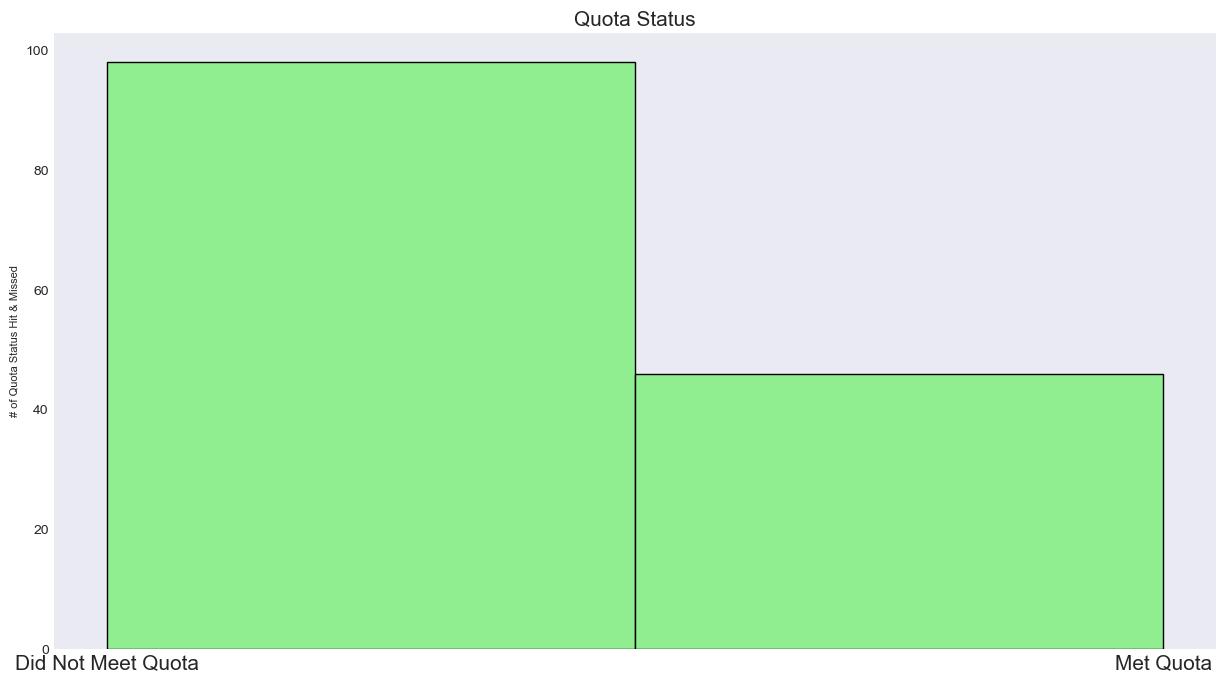

In [25]:
# creating a histogram for the above question
plt.figure(figsize = (15, 8))
plt.hist(quota_status['Quota Status'], bins = 2, align = 'mid', color = 'lightgreen', edgecolor = 'black')
plt.title('Quota Status', fontsize = 15)
plt.ylabel('# of Quota Status Hit & Missed', fontsize = 8)
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 15)
plt.show()